# sM1_12-12-2023_02: Parkinsonian, Quiet Wakefulness

This notebook shows how you can analyze data streamed from our NWB data residing in the DANDI archive.

In [1]:
from dandi.dandiapi import DandiAPIClient
import fsspec
from fsspec.implementations.cached import CachingFileSystem
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pynwb
import quantities as pq

from elephant.statistics import time_histogram


The data used in this tutorial were used in this publication: Doherty, et al. "Enhanced beta power emerges from simulated parkinsonian primary motor cortex." npj Parkinson's Disease (2025). (https://doi.org/10.1101/2024.05.23.595566) The data can be found on the DANDI Archive in Dandiset 001444.

In [2]:
dandiset_id = "001444"
filepath = "sub-001/sub-001_ses-sM1-12-12-2023-02.nwb"
with DandiAPIClient() as client:
    asset = client.get_dandiset(dandiset_id, 'draft').get_asset_by_path(filepath)
    s3_url = asset.get_content_url(follow_redirects=1, strip_query=True)
    

Stream the NWB files from DANDI

In [3]:
# create a virtual http filesystem with local caching
fs = CachingFileSystem(
    fs=fsspec.filesystem("http"),
    cache_storage="nwb-cache",  # local folder for the cache
)


In [4]:
# open the file using the S3 URL
f = fs.open(s3_url, "rb")
file = h5py.File(f)
io = pynwb.NWBHDF5IO(file=file)
nwbfile = io.read()


## Plot the Local Field Potential (LFP)

([], [])

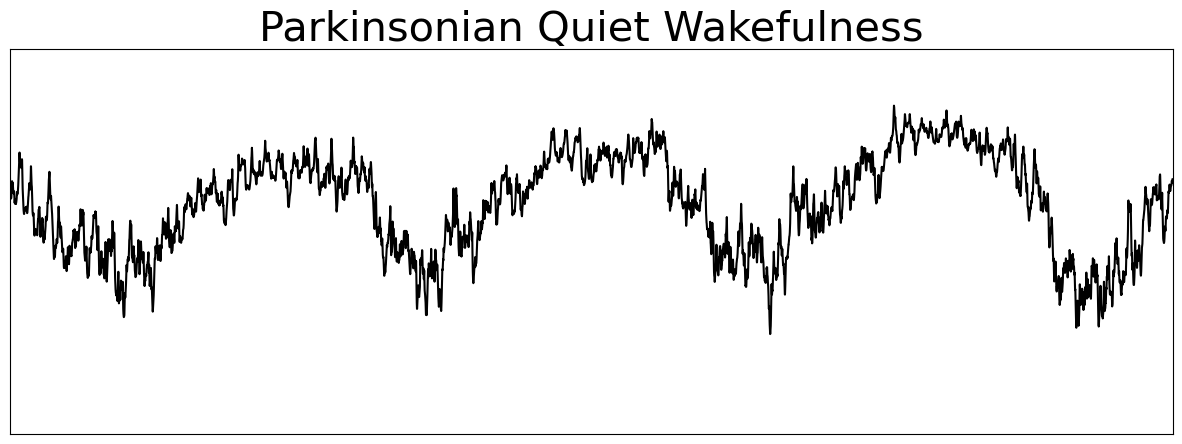

In [5]:
# 40 samples per ms
# data window from 2 seconds (2000 ms) to 2.25 sec (2250 ms)
xmin = 2000 * 40
xmax = 2250 * 40
plt.figure(figsize=(15,5))
plt.xlim(xmin, xmax)
plt.ylim(-0.17, 0.05)
plt.title('Parkinsonian Quiet Wakefulness', fontsize= 30)
plt.plot(nwbfile.acquisition.get('Segment 0 LFP 0').data, color='black')
plt.xticks([])
plt.yticks([])


## Raster plot of all M1 neurons

In [6]:
units_df = nwbfile.units.to_dataframe()

excitatory_neurons = ['IT2', 'IT4', 'IT5A', 'IT5B', 'PT5B', 'IT6', 'CT6']
inhibitory_neurons = ['PV2', 'SOM2', 'PV5A', 'SOM5A', 'PV5B', 'SOM5B', 'PV6', 'SOM6']


In [7]:
for i, unit in enumerate(units_df['_name']):
    pop_unit = unit.split()
    units_df.loc[i, 'pop'] = pop_unit[0]
    units_df.loc[i, 'unit'] = pop_unit[1]
    if units_df.loc[i]['pop'] in excitatory_neurons:
        units_df.loc[i, 'color'] = 'red'
    elif units_df.loc[i]['pop'] in inhibitory_neurons:
        units_df.loc[i, 'color'] = 'black'

units_df['unit'].astype(int, copy=False);


In [8]:
m1_units_df = units_df[~units_df['color'].isna()]


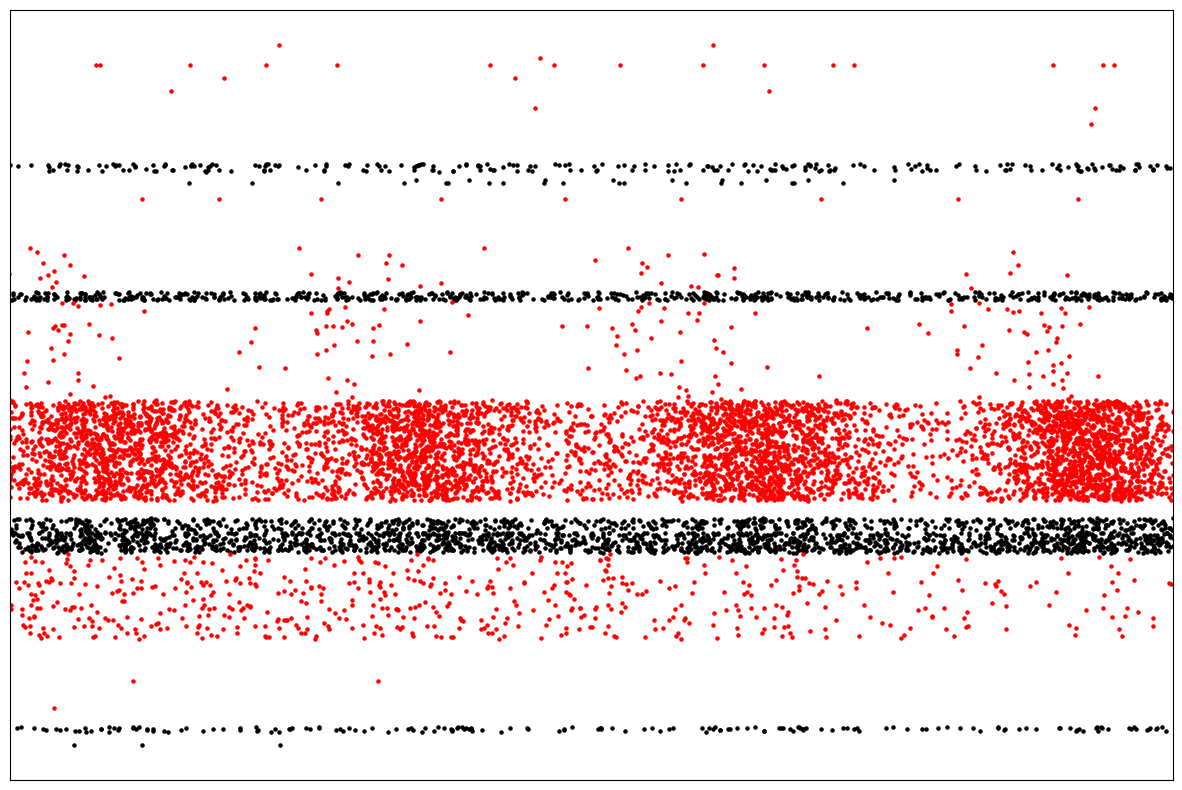

In [9]:
plt.figure(figsize=(15,10))
#plt.ylim(0, 10073)
plt.gca().invert_yaxis()
ax = plt.gca()

xmin = 2.000
xmax = 2.250
plt.xlim(xmin, xmax)

ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks([])
plt.yticks([])

for i, st in enumerate(m1_units_df['spike_times']):
    ax.scatter(st, np.full(len(m1_units_df.iloc[i]['spike_times']), m1_units_df.iloc[i]['unit'], dtype=int), color=m1_units_df.iloc[i]['color'], s=5)


## Plot example pyramidal tract (PT5B) neuron membrane potential traces

Example traces in Fig 2 and 5 are from PT5B 5401, 5501, 5702, 5602, and 6201 2000-2250 ms

In [10]:
start = 2000*40
stop = 2250*40


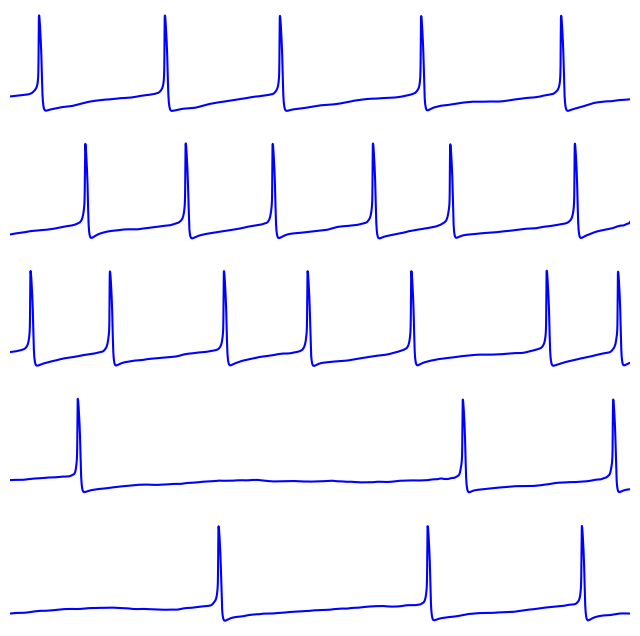

In [12]:
example_traces = ['Segment 0 PT5B 5401 5', 'Segment 0 PT5B 5501 7', 'Segment 0 PT5B 5702 12', 'Segment 0 PT5B 5602 10', 'Segment 0 PT5B 6201 15']

fig = plt.figure(figsize=(8,8))

ax = fig.subplots(5, 1)
for i, vm in enumerate(example_traces):
    vm_data = nwbfile.acquisition.get(vm).data
    ax[i].set_xlim(start, stop)
    ax[i].tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].plot(vm_data, color='blue')


## Simplified, interactive representation of the contents of this NWB file

In [13]:
nwbfile


Data type,float64
Shape,"(172000, 1)"
Array size,1.31 MiB
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,1.0
Data type,float64
Shape,"(172000, 1)"
Array size,1.31 MiB
Chunk shape,None
